# Heart Disease

Explicar la presència o absència de malaltia cardiovascular donat uns factors de risc, per això, es disposa del conjunt de dades **cardio_train.csv** obtingut de Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

Carreguem les llibreries disponibles:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *

Lectura de dades:

In [2]:
hd = pd.read_csv('./../data/cardio_train.csv', sep = ";", index_col = 0)

## Anàlisi inicial

Primer contacte amb el conjunt de dades:

In [3]:
hd.shape

(70000, 12)

In [4]:
hd.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
hd.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


Conjunt de dades format per 12 variables (11 amb valors enters i només una amb decimals), en el que no hi ha cap missing. Com consta en la descripció del conjunt de dades, és una variable objectiu (binària) i 11 variables amb característiques/features. 

Creem algunes variables d'interès:

- L'edat està calculda en dies, la passem a anys

In [7]:
hd['age_years'] = (hd['age']/365.25).round().astype('int')

- Índex de massa corporal, calculada a partir de l'alçada i el pes

In [8]:
hd['BMI'] = hd['weight']/((hd['height']/100)**2)

## Anàlisi descriptiu

Descriptiva general del conjunt de dades

In [9]:
hd.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.303157,27.556513
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.760171,6.091511
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667


Encara que en el conjunt de dades no hi ha cap missing. Si que sembla que hi hagin dades errònies, o almenys valors molt extrems (els valors màxims són molt més alts que els valors del percentil 75 o els valors mínim sóm molt més petits que el percentil 25):
- Alçada màxima és de 250 cm
- Alçada mínima de 55 cm (població adulta: 30-65 anys)
- Pes màxim de 200 Kg 
- Pes mínim de 10 Kg (població adulta: 30-65 anys)
- Valors de pressions (sistòlica i diastòlica) molt elevats
- Valors de pressions negatius

Ho mirem tambés amb uns gràfics:

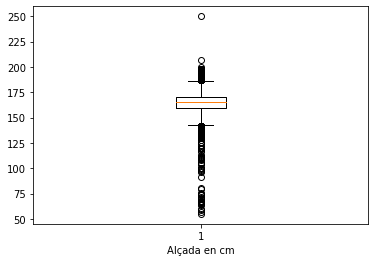

In [10]:
plt.boxplot(hd['height'])
plt.xlabel("Alçada en cm")
plt.show()

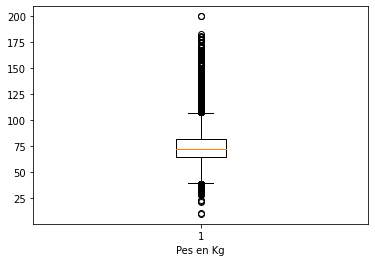

In [11]:
plt.boxplot(hd['weight'])
plt.xlabel("Pes en Kg")
plt.show()

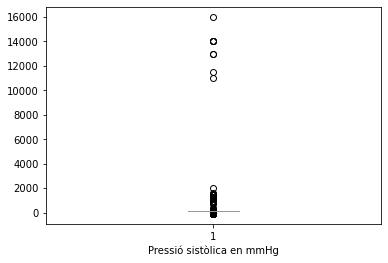

In [12]:
plt.boxplot(hd['ap_hi'])
plt.xlabel("Pressió sistòlica en mmHg")
plt.show()

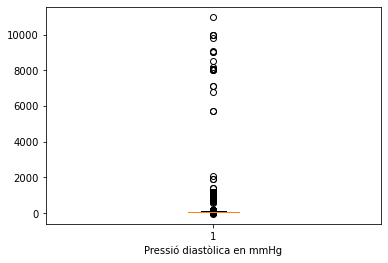

In [13]:
plt.boxplot(hd['ap_lo'])
plt.xlabel("Pressió diastòlica en mmHg")
plt.show()

Hi ha força valors "extrems" tant pel que fa als valors mínims com als màxims. Haurem d'eliminar aquestes casos del nostre conjunt de dades. Abans revisem un error de notificació típic d'aquest tipus de dades, intercanviar els valors de pressió diastòlica i sistòlica

In [14]:
hd2 = hd
hd2.shape

(70000, 14)

La pressió diastòlica (ap_lo) ha de ser menor que la pressió sistòlica (ap_hi)

In [15]:
hd2['pres_ok'] = (hd2['ap_lo'] < hd2['ap_hi']).astype('int')

In [16]:
hd2['pres_ok'].value_counts()

1    68764
0     1236
Name: pres_ok, dtype: int64

És possible que part dels valors extrems en les variables de pressió sistòlica i diastòlica sigui per aquest possible intercanvi de paràmetres. Si eliminem els casos més extrems del nostre conjunt de dades, segurament eliminem aquests casos. 
Eliminem del nostre conjunt de dades els valors més extrems, i ho farem quedant-nos només amb valors d'aquestes 4 variables que estiguin entre el percentil 2.5-97.5

In [17]:
hd2.drop(hd2[(hd2['height'] > hd2['height'].quantile(0.975)) | (hd2['height'] < hd2['height'].quantile(0.025))].index, inplace=True)

In [18]:
hd2.drop(hd2[(hd2['weight'] > hd2['weight'].quantile(0.975)) | (hd2['weight'] < hd2['weight'].quantile(0.025))].index, inplace=True)

In [19]:
hd2.drop(hd2[(hd2['ap_hi'] > hd2['ap_hi'].quantile(0.975)) | (hd2['ap_hi'] < hd2['ap_hi'].quantile(0.025))].index, inplace=True)

In [20]:
hd2.drop(hd2[(hd2['ap_lo'] > hd2['ap_lo'].quantile(0.975)) | (hd2['ap_lo'] < hd2['ap_lo'].quantile(0.025))].index, inplace=True)

Revisem els casos subseptibles que s'hagin intercanviat els paràmetres de la pressió

In [21]:
hd2['pres_ok'].value_counts()

1    60141
0        1
Name: pres_ok, dtype: int64

Només ha quedat un cas, l'eliminem

In [22]:
hd2.drop(hd2[(hd2['pres_ok'] == 0)].index, inplace=True)

Un cop eliminats aquests valors, tornem a explorar el conjunt de dades:

In [23]:
hd2.shape

(60141, 15)

In [24]:
hd2.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,pres_ok
count,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.000000,60141.0
mean,19468.781198,1.347301,164.554630,73.426280,125.770955,81.045992,1.350959,1.220232,0.085632,0.051878,0.803661,0.488219,53.303537,27.170529,1.0
std,2460.484949,0.476116,6.830011,11.614189,13.761560,8.238863,0.670080,0.567611,0.279822,0.221783,0.397231,0.499865,6.742020,4.404558,0.0
min,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,16.049383,1.0
25%,17678.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,1.0
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.259585,1.0
75%,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.752066,1.0
max,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,46.666667,1.0


En aquest subconjunt de dades, sembla que les dades són més "coherents".

### Anàlisi descriptiu - univariant

Gràfics variables continues:

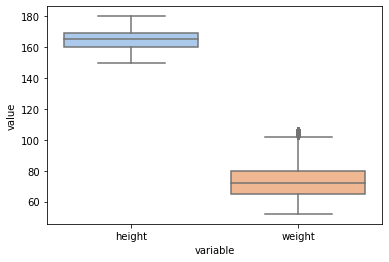

In [25]:
antro = hd2.loc[:,['height','weight']]
sns.boxplot(x='variable',y='value',data=antro.melt(),palette="pastel")
plt.savefig("./../Projecte/graf/Boxplot Alçada-Pes.png")
plt.show()

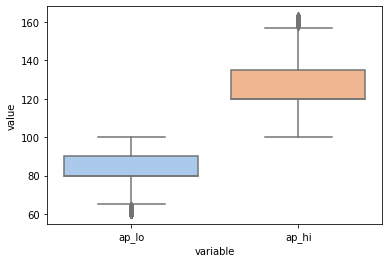

In [26]:
pressio = hd2.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x='variable',y='value',data=pressio.melt(),palette="pastel")
plt.savefig("./../Projecte/graf/Boxplot Pressio.png")
plt.show()

Gràfics variables discretes:

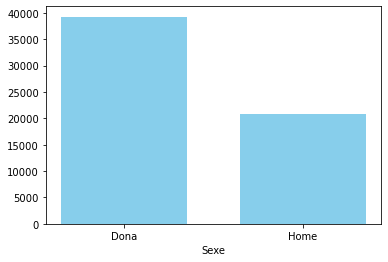

In [27]:
sexe_counts = hd2['gender'].value_counts(sort = False)
sexe_counts.index = ('Dona','Home')
sexe_counts
plt.bar(sexe_counts.index,sexe_counts.values,width=0.7,color="skyblue")
plt.xlabel("Sexe")
plt.savefig("./../Projecte/graf/Barres sexe.png")
plt.show()

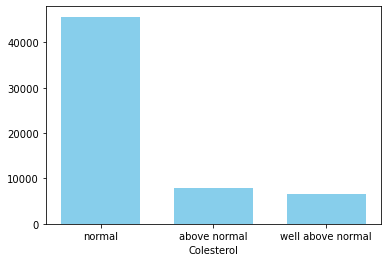

In [28]:
colesterol_counts = hd2['cholesterol'].value_counts(sort = False)
colesterol_counts.index = ('normal','above normal','well above normal')
colesterol_counts
plt.bar(colesterol_counts.index,colesterol_counts.values,width=0.7,color="skyblue")
plt.xlabel("Colesterol")
plt.savefig("./../Projecte/graf/Barres colesterol.png")
plt.show()

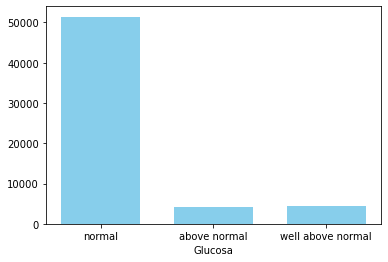

In [29]:
gluc_counts = hd2['gluc'].value_counts(sort = False)
gluc_counts.index = ('normal','above normal','well above normal')
gluc_counts
plt.bar(gluc_counts.index,gluc_counts.values,width=0.7,color="skyblue")
plt.xlabel("Glucosa")
plt.savefig("./../Projecte/graf/Barres glucosa.png")
plt.show()

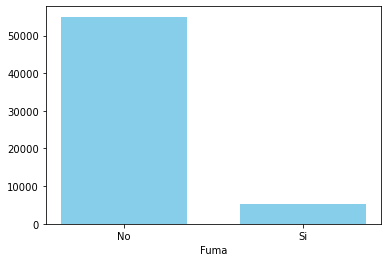

In [30]:
fuma_counts = hd2['smoke'].value_counts(sort = False)
fuma_counts.index = ('No','Si')
fuma_counts
plt.bar(fuma_counts.index,fuma_counts.values,width=0.7,color="skyblue")
plt.xlabel("Fuma")
plt.savefig("./../Projecte/graf/Barres fuma.png")
plt.show()

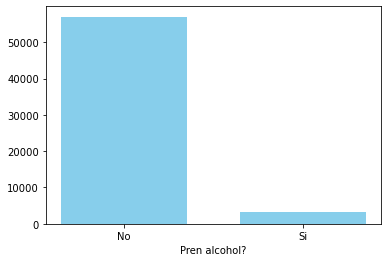

In [31]:
alcohol_counts = hd2['alco'].value_counts(sort = False)
alcohol_counts.index = ('No','Si')
alcohol_counts
plt.bar(alcohol_counts.index,alcohol_counts.values,width=0.7,color="skyblue")
plt.xlabel("Pren alcohol?")
plt.savefig("./../Projecte/graf/Barres alcohol.png")
plt.show()

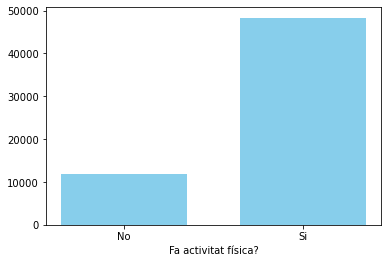

In [32]:
actiu_counts = hd2['active'].value_counts(sort = False)
actiu_counts.index = ('No','Si')
actiu_counts
plt.bar(actiu_counts.index,actiu_counts.values,width=0.7,color="skyblue")
plt.xlabel("Fa activitat física?")
plt.savefig("./../Projecte/graf/Barres actiu.png")
plt.show()

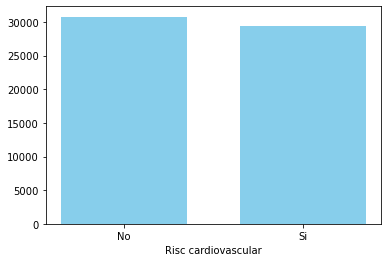

In [33]:
risc_counts = hd2['cardio'].value_counts(sort = False)
risc_counts.index = ('No','Si')
risc_counts
plt.bar(risc_counts.index,risc_counts.values,width=0.7,color="skyblue")
plt.xlabel("Risc cardiovascular")
plt.savefig("./../Projecte/graf/Barres risc cardiovascular.png")
plt.show()

### Anàlisi descriptiu - bivariant

Descriptiva de les variables continues per la presència o absència de malaltia cardiovascular

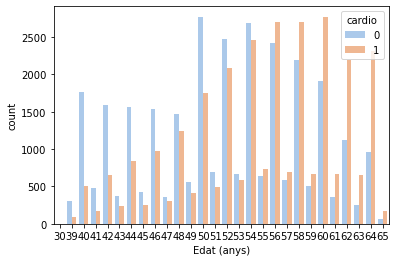

In [34]:
sns.countplot(x='age_years', hue='cardio', data = hd2, palette="pastel")
plt.xlabel("Edat (anys)")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x edat.png")
plt.show()

La presència o absència de risc cardiovascular està relacionada amb l’edat, a mesura que augmenta l’edat l’exposició al risc cardiovascular augmenta 

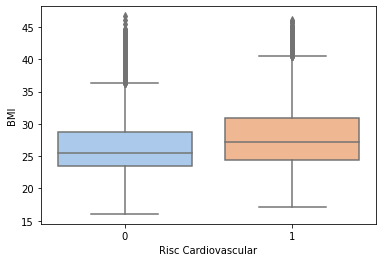

In [35]:
sns.boxplot(x="cardio", y="BMI", data=hd2, palette="pastel")
plt.xlabel("Risc Cardiovascular")
plt.savefig("./../Projecte/graf/Boxplot Risc cardiovascular x BMI.png")
plt.show()

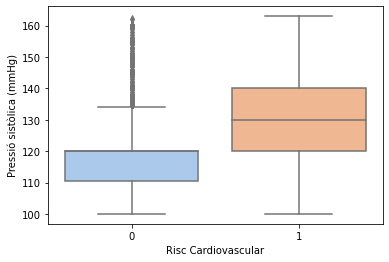

In [36]:
sns.boxplot(x="cardio", y="ap_hi", data=hd2, palette="pastel")
plt.xlabel("Risc Cardiovascular")
plt.ylabel("Pressió sistòlica (mmHg)")
plt.savefig("./../Projecte/graf/Boxplot Risc cardiovascular x Sistòlica.png")
plt.show()

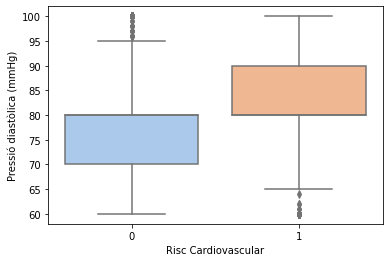

In [37]:
sns.boxplot(x="cardio", y="ap_lo", data=hd2, palette="pastel")
plt.xlabel("Risc Cardiovascular")
plt.ylabel("Pressió diastòlica (mmHg)")
plt.savefig("./../Projecte/graf/Boxplot Risc cardiovascular x Diastòlica.png")
plt.show()

La presència o absència de risc cardiovascular està relacionada amb l'índex de massa corporal (BMI) i la pressió sistòlica o diastòlica, la presència de risc cardiovascular té un major valor d'aquestes covariables

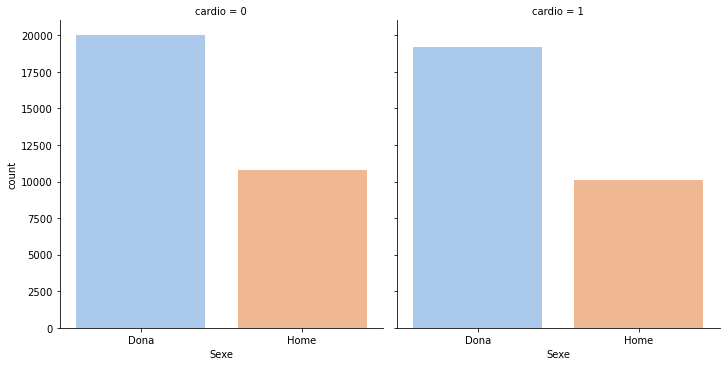

In [38]:
g1 = sns.catplot(x="gender", col="cardio", data=hd2, kind="count", palette="pastel")
g1.set_xticklabels(['Dona','Home'])
g1.set_axis_labels("Sexe", "count")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x sexe.png")
plt.show()

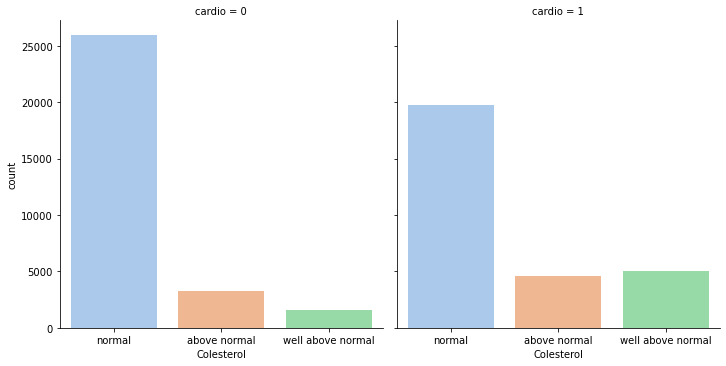

In [39]:
g2 = sns.catplot(x="cholesterol", col="cardio", data=hd2, kind="count", palette="pastel")
g2.set_xticklabels(['normal','above normal','well above normal'])
g2.set_axis_labels("Colesterol", "count")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x Colesterol.png")
plt.show()

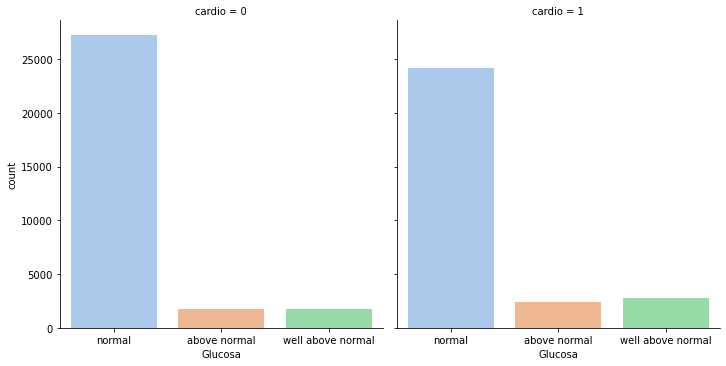

In [40]:
g3 = sns.catplot(x="gluc", col="cardio", data=hd2, kind="count", palette="pastel")
g3.set_xticklabels(['normal','above normal','well above normal'])
g3.set_axis_labels("Glucosa", "count")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x Glucosa.png")
plt.show()

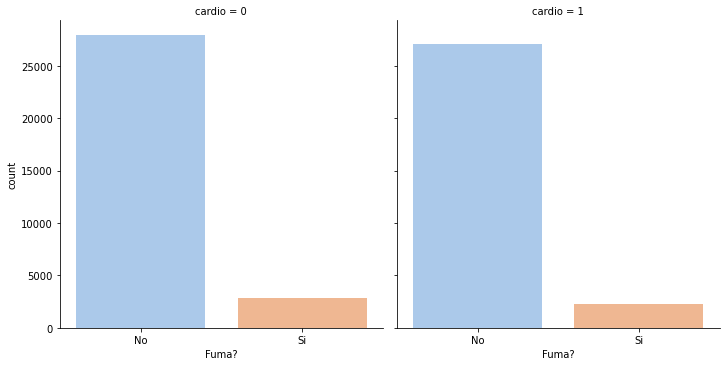

In [41]:
g4 = sns.catplot(x="smoke", col="cardio", data=hd2, kind="count", palette="pastel")
g4.set_xticklabels(['No','Si'])
g4.set_axis_labels("Fuma?", "count")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x Fuma.png")
plt.show()

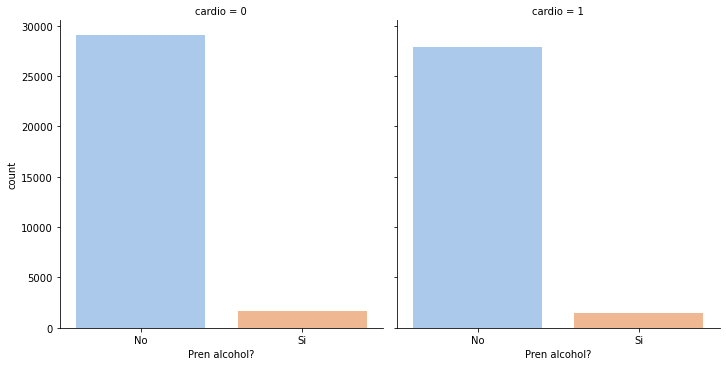

In [42]:
g5 = sns.catplot(x="alco", col="cardio", data=hd2, kind="count", palette="pastel")
g5.set_xticklabels(['No','Si'])
g5.set_axis_labels("Pren alcohol?", "count")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x Alcohol.png")
plt.show()

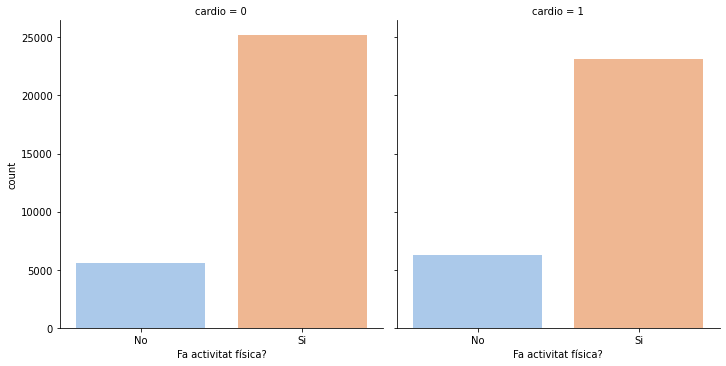

In [43]:
g6 = sns.catplot(x="active", col="cardio", data=hd2, kind="count", palette="pastel")
g6.set_xticklabels(['No','Si'])
g6.set_axis_labels("Fa activitat física?", "count")
plt.savefig("./../Projecte/graf/Barres Risc cardiovascular x Actiu.png")
plt.show()

Exceptuant a variable colesterol, les altres variables segueixen el mateix patró en les pel que fa als casos amb presència o no de risc cardiovascular

In [60]:
hd2.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,pres_ok
age,1.000000,-0.024541,-0.082348,0.063590,0.203923,0.146529,0.152178,0.096594,-0.047276,-0.028086,-0.012100,0.237423,0.999084,0.106747,NaN
gender,-0.024541,1.000000,0.501633,0.128804,0.044140,0.048885,-0.041980,-0.023873,0.336781,0.167456,0.007115,-0.004851,-0.024564,-0.139006,NaN
height,-0.082348,0.501633,1.000000,0.248318,-0.011004,0.007260,-0.069305,-0.030204,0.184878,0.088020,-0.005270,-0.030800,-0.082222,-0.278330,NaN
weight,0.063590,0.128804,0.248318,1.000000,0.231305,0.210775,0.129347,0.087563,0.055736,0.057309,-0.011840,0.157969,0.063532,0.858043,NaN
ap_hi,0.203923,0.044140,-0.011004,0.231305,1.000000,0.695802,0.187123,0.082736,0.020725,0.023588,0.002964,0.428595,0.203884,0.233951,NaN
ap_lo,0.146529,0.048885,0.007260,0.210775,0.695802,1.000000,0.146862,0.061299,0.018314,0.025976,0.000940,0.321531,0.146491,0.204024,NaN
cholesterol,0.152178,-0.041980,-0.069305,0.129347,0.187123,0.146862,1.000000,0.454122,0.004573,0.025623,0.007816,0.216649,0.152275,0.164307,NaN
gluc,0.096594,-0.023873,-0.030204,0.087563,0.082736,0.061299,0.454122,1.000000,-0.009966,0.003682,-0.007116,0.085887,0.096333,0.102298,NaN
smoke,-0.047276,0.336781,0.184878,0.055736,0.020725,0.018314,0.004573,-0.009966,1.000000,0.342372,0.026649,-0.023458,-0.047350,-0.042454,NaN
alco,-0.028086,0.167456,0.088020,0.057309,0.023588,0.025976,0.025623,0.003682,0.342372,1.000000,0.025589,-0.014735,-0.028146,0.010014,NaN


## Preparació dades

Definim la variable objectiu

In [45]:
y = hd2["cardio"]

Algunes de les variables característiques o features les hem de transformar. Les variables continues les estandaritzem per evitar problemes amb les diferents magnituts i les variables categòriques no binàries les transformem a dummies.

In [46]:
hd3 = hd2
hd3 = hd3.drop(['cardio','age','pres_ok'],axis=1)

In [47]:
hd3.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI
id,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,52,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,48,23.011177


In [48]:
hd3.corr()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI
gender,1.000000,0.501633,0.128804,0.044140,0.048885,-0.041980,-0.023873,0.336781,0.167456,0.007115,-0.024564,-0.139006
height,0.501633,1.000000,0.248318,-0.011004,0.007260,-0.069305,-0.030204,0.184878,0.088020,-0.005270,-0.082222,-0.278330
weight,0.128804,0.248318,1.000000,0.231305,0.210775,0.129347,0.087563,0.055736,0.057309,-0.011840,0.063532,0.858043
ap_hi,0.044140,-0.011004,0.231305,1.000000,0.695802,0.187123,0.082736,0.020725,0.023588,0.002964,0.203884,0.233951
ap_lo,0.048885,0.007260,0.210775,0.695802,1.000000,0.146862,0.061299,0.018314,0.025976,0.000940,0.146491,0.204024
cholesterol,-0.041980,-0.069305,0.129347,0.187123,0.146862,1.000000,0.454122,0.004573,0.025623,0.007816,0.152275,0.164307
gluc,-0.023873,-0.030204,0.087563,0.082736,0.061299,0.454122,1.000000,-0.009966,0.003682,-0.007116,0.096333,0.102298
smoke,0.336781,0.184878,0.055736,0.020725,0.018314,0.004573,-0.009966,1.000000,0.342372,0.026649,-0.047350,-0.042454
alco,0.167456,0.088020,0.057309,0.023588,0.025976,0.025623,0.003682,0.342372,1.000000,0.025589,-0.028146,0.010014
active,0.007115,-0.005270,-0.011840,0.002964,0.000940,0.007816,-0.007116,0.026649,0.025589,1.000000,-0.011957,-0.009508


- Estandaritzem variables continues

In [49]:
cols_to_scale = ['ap_hi','ap_lo','age_years','BMI']

In [50]:
scaler = StandardScaler()
scaler.fit(hd3[cols_to_scale])
hd3[cols_to_scale] = scaler.transform(hd3[cols_to_scale])

In [51]:
hd3.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI
id,,,,,,,,,,,,
0,2,168,62.0,-1.146025,-0.126959,1,1,0,0,1,-0.489996,-1.181379
1,1,156,85.0,1.033979,1.086810,3,1,0,0,1,0.251627,1.761179
2,1,165,64.0,0.307311,-1.340729,3,1,0,0,0,-0.193347,-0.831583
3,2,169,82.0,1.760647,2.300580,1,1,0,0,1,-0.786646,0.349630
4,1,156,56.0,-1.872692,-2.554499,1,1,0,0,0,-0.786646,-0.944337


- Creem dummies de les variables colesterol i glucosa

In [52]:
hd3b = pd.get_dummies(hd3, columns = ['cholesterol', 'gluc'])
hd3b.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,BMI,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,2,168,62.0,-1.146025,-0.126959,0,0,1,-0.489996,-1.181379,1,0,0,1,0,0
1,1,156,85.0,1.033979,1.086810,0,0,1,0.251627,1.761179,0,0,1,1,0,0
2,1,165,64.0,0.307311,-1.340729,0,0,0,-0.193347,-0.831583,0,0,1,1,0,0
3,2,169,82.0,1.760647,2.300580,0,0,1,-0.786646,0.349630,1,0,0,1,0,0
4,1,156,56.0,-1.872692,-2.554499,0,0,0,-0.786646,-0.944337,1,0,0,1,0,0


- Recodifiquem la variable sexe, la passem a dummy

In [53]:
hd3b['gender2'] = hd3b['gender'] - 1 

Creem el conjunt de dades X amb les variables característiques a analitzar

In [54]:
X = hd3b[['gender2','age_years','BMI','ap_hi','ap_lo','cholesterol_2','cholesterol_3','gluc_2','gluc_3','smoke','alco','active']]

In [55]:
X.head()

,gender2,age_years,BMI,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke,alco,active
id,,,,,,,,,,,,
0,1,-0.489996,-1.181379,-1.146025,-0.126959,0,0,0,0,0,0,1
1,0,0.251627,1.761179,1.033979,1.086810,0,1,0,0,0,0,1
2,0,-0.193347,-0.831583,0.307311,-1.340729,0,1,0,0,0,0,0
3,1,-0.786646,0.349630,1.760647,2.300580,0,0,0,0,0,0,1
4,0,-0.786646,-0.944337,-1.872692,-2.554499,0,0,0,0,0,0,0


Dividim els conjunts de dades en Train i Test, fem que Train tingui el 67% de les observacions i Test el 33% restant, amb la instrucció shape ho revisem

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40294, 12) (19847, 12) (40294,) (19847,)


## Regressio Logística

Ajustem el model de regressió logística

In [57]:
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

LogisticRegression()

Valors predits i mètriques

In [58]:
y_logreg1_pred = logreg1.predict(X_test)

In [59]:
report1t = classification_report(y_test, y_logreg1_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report1t["accuracy"]))
print("Precision = {0:0.3f}".format(report1t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report1t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report1t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report1t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.721
Precision = 0.750
Specificity = 0.792
Sensitivity = 0.646
F1-score = 0.694


In [62]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_logreg1_pred))

Confusion matrix:
[[8006 2102]
 [3445 6294]]


In [63]:
conf1 = metrics.confusion_matrix(y_test, y_logreg1_pred)
print("True positives:", conf1[1,1])
print("True negatives:", conf1[0,0])
print("False Positives:", conf1[0,1])
print("False Negatives:", conf1[1,0])

True positives: 6294
True negatives: 8006
False Positives: 2102
False Negatives: 3445


Ajustem un altre model, únicament amb les variables que haviem vist gràficament que tenien una certa dependència

In [64]:
X_train2 = X_train[['age_years','BMI','ap_hi','ap_lo','cholesterol_2','cholesterol_3']]

In [65]:
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train)

LogisticRegression()

In [66]:
X_test2 = X_test[['age_years','BMI','ap_hi','ap_lo','cholesterol_2','cholesterol_3']]
y_logreg2_pred = logreg2.predict(X_test2)

In [67]:
report2t = classification_report(y_test, y_logreg2_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report2t["accuracy"]))
print("Precision = {0:0.3f}".format(report2t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report2t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report2t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report2t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.718
Precision = 0.749
Specificity = 0.794
Sensitivity = 0.638
F1-score = 0.689


In [68]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_logreg2_pred))

Confusion matrix:
[[8030 2078]
 [3525 6214]]


In [69]:
conf2 = metrics.confusion_matrix(y_test, y_logreg2_pred)
print("True positives:", conf2[1,1])
print("True negatives:", conf2[0,0])
print("False Positives:", conf2[0,1])
print("False Negatives:", conf2[1,0])

True positives: 6214
True negatives: 8030
False Positives: 2078
False Negatives: 3525


El model 2 amb menys features, no aconseguim millorar el model.
Provarem un tercer model, amb només una de les unes variables de pressió donat que estan "fortament" correlacionades

In [71]:
X_train3 = X_train[['gender2','age_years','BMI','ap_hi','cholesterol_2','cholesterol_3','gluc_2','gluc_3','smoke','alco','active']]

In [72]:
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train)

LogisticRegression()

In [74]:
X_test3 = X_test[['gender2','age_years','BMI','ap_hi','cholesterol_2','cholesterol_3','gluc_2','gluc_3','smoke','alco','active']]
y_logreg3_pred = logreg3.predict(X_test3)

In [75]:
report3t = classification_report(y_test, y_logreg3_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report3t["accuracy"]))
print("Precision = {0:0.3f}".format(report3t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report3t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report3t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report3t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.720
Precision = 0.750
Specificity = 0.793
Sensitivity = 0.643
F1-score = 0.692


In [76]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_logreg3_pred))

Confusion matrix:
[[8019 2089]
 [3478 6261]]


In [77]:
conf3 = metrics.confusion_matrix(y_test, y_logreg3_pred)
print("True positives:", conf3[1,1])
print("True negatives:", conf3[0,0])
print("False Positives:", conf3[0,1])
print("False Negatives:", conf3[1,0])

True positives: 6261
True negatives: 8019
False Positives: 2089
False Negatives: 3478


Tampoc hem aconseguit millorar el model

## Arbre de decisió

Creem arbre de decisió

In [78]:
clf_train1 = DecisionTreeClassifier()
clf_train1 = clf_train1.fit(X_train,y_train)

Valors predits i mètriques

In [79]:
y_clf_train1_pred = clf_train1.predict(X_test)

In [80]:
report1t_clf = classification_report(y_test, y_clf_train1_pred,digits=3,output_dict = True)

print("Decision TreeClassifier Model:")
print("Accuracy = {0:0.3f}".format(report1t_clf["accuracy"]))
print("Precision = {0:0.3f}".format(report1t_clf["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report1t_clf["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report1t_clf["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report1t_clf["1"]["f1-score"]))

Decision TreeClassifier Model:
Accuracy = 0.632
Precision = 0.631
Specificity = 0.659
Sensitivity = 0.604
F1-score = 0.617


In [81]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_clf_train1_pred))

Confusion matrix:
[[6663 3445]
 [3857 5882]]


In [82]:
conf1_clf = metrics.confusion_matrix(y_test, y_clf_train1_pred)
print("True positives:", conf1_clf[1,1])
print("True negatives:", conf1_clf[0,0])
print("False Positives:", conf1_clf[0,1])
print("False Negatives:", conf1_clf[1,0])

True positives: 5882
True negatives: 6663
False Positives: 3445
False Negatives: 3857


## K-Nearest Neighbors

Ajustem el model K-Nearest Neighbors

In [83]:
knn_train1 = KNeighborsClassifier(n_neighbors=5)
knn_train1.fit(X_train, y_train)

KNeighborsClassifier()

Valors predits i mètriques

In [84]:
y_knn_train1_pred = knn_train1.predict(X_test)

In [85]:
report1t_knn = classification_report(y_test, y_knn_train1_pred,digits=3,output_dict = True)

print("K-Nearest Neighbors Model:")
print("Accuracy = {0:0.3f}".format(report1t_knn["accuracy"]))
print("Precision = {0:0.3f}".format(report1t_knn["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report1t_knn["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report1t_knn["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report1t_knn["1"]["f1-score"]))

K-Nearest Neighbors Model:
Accuracy = 0.689
Precision = 0.690
Specificity = 0.711
Sensitivity = 0.667
F1-score = 0.678


In [86]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_knn_train1_pred))

Confusion matrix:
[[7187 2921]
 [3244 6495]]


In [87]:
conf1_knn = metrics.confusion_matrix(y_test, y_knn_train1_pred)
print("True positives:", conf1_knn[1,1])
print("True negatives:", conf1_knn[0,0])
print("False Positives:", conf1_knn[0,1])
print("False Negatives:", conf1_knn[1,0])

True positives: 6495
True negatives: 7187
False Positives: 2921
False Negatives: 3244


## Support Vector Machines

Ajustem el model de Support Vector Machines

In [88]:
svc_train1 = SVC()
svc_train1.fit(X_train, y_train)

SVC()

Valors predits i mètriques

In [89]:
y_svc_train1_pred = svc_train1.predict(X_test)

In [90]:
report1t_svc = classification_report(y_test, y_svc_train1_pred,digits=3,output_dict = True)

print("Support Vector Machines Model:")
print("Accuracy = {0:0.3f}".format(report1t_svc["accuracy"]))
print("Precision = {0:0.3f}".format(report1t_svc["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report1t_svc["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report1t_svc["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report1t_svc["1"]["f1-score"]))

Support Vector Machines Model:
Accuracy = 0.728
Precision = 0.758
Specificity = 0.798
Sensitivity = 0.655
F1-score = 0.702


In [91]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_svc_train1_pred))

Confusion matrix:
[[8068 2040]
 [3363 6376]]


In [92]:
conf1_svc = metrics.confusion_matrix(y_test, y_svc_train1_pred)
print("True positives:", conf1_svc[1,1])
print("True negatives:", conf1_svc[0,0])
print("False Positives:", conf1_svc[0,1])
print("False Negatives:", conf1_svc[1,0])

True positives: 6376
True negatives: 8068
False Positives: 2040
False Negatives: 3363
